In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import brewer2mpl
from matplotlib import rcParams

In [2]:
brewer2mpl.print_maps()

Sequential
Blues     :  {3, 4, 5, 6, 7, 8, 9}
BuGn      :  {3, 4, 5, 6, 7, 8, 9}
BuPu      :  {3, 4, 5, 6, 7, 8, 9}
GnBu      :  {3, 4, 5, 6, 7, 8, 9}
Greens    :  {3, 4, 5, 6, 7, 8, 9}
Greys     :  {3, 4, 5, 6, 7, 8, 9}
OrRd      :  {3, 4, 5, 6, 7, 8, 9}
Oranges   :  {3, 4, 5, 6, 7, 8, 9}
PuBu      :  {3, 4, 5, 6, 7, 8, 9}
PuBuGn    :  {3, 4, 5, 6, 7, 8, 9}
PuRd      :  {3, 4, 5, 6, 7, 8, 9}
Purples   :  {3, 4, 5, 6, 7, 8, 9}
RdPu      :  {3, 4, 5, 6, 7, 8, 9}
Reds      :  {3, 4, 5, 6, 7, 8, 9}
YlGn      :  {3, 4, 5, 6, 7, 8, 9}
YlGnBu    :  {3, 4, 5, 6, 7, 8, 9}
YlOrBr    :  {3, 4, 5, 6, 7, 8, 9}
YlOrRd    :  {3, 4, 5, 6, 7, 8, 9}
Diverging
BrBG      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PRGn      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PiYG      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PuOr      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdBu      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdGy      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdYlBu    :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdYlGn    :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
Spect

In [3]:
dark2_cmap = brewer2mpl.get_map('Dark2','Qualitative',7)
dark2_colors = dark2_cmap.mpl_colors

In [4]:
dark2_cmap.colorbrewer2()

In [5]:
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/Users/anshu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [7]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [8]:
df = pd.read_csv('olive.csv')
df

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46
5,6.North-Apulia,1,1,911,49,268,7924,678,51,70,44
6,7.North-Apulia,1,1,922,66,264,7990,618,49,56,29
7,8.North-Apulia,1,1,1100,61,235,7728,734,39,64,35
8,9.North-Apulia,1,1,1082,60,239,7745,709,46,83,33
9,10.North-Apulia,1,1,1037,55,213,7944,633,26,52,30


In [9]:
df.columns

Index([u'Unnamed: 0', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')

In [10]:
df = df.rename(columns={df.columns[0]:'areastring'})

In [11]:
print('regions',df.region.unique())
print ('area', df.area.unique())


('regions', array([1, 2, 3]))
('area', array([1, 2, 3, 4, 5, 6, 9, 7, 8]))


In [12]:
pd.crosstab(df.region,df.area)

area,1,2,3,4,5,6,7,8,9
region,,,,,,,,,
1,25,56,206,36,0,0,0,0,0
2,0,0,0,0,65,33,0,0,0
3,0,0,0,0,0,0,50,50,51


In [13]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [14]:
df.areastring = df.areastring.map(lambda x : x.split('.')[-1])

In [15]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [16]:
print(df.areastring.unique())

['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']


In [17]:
pd.crosstab(df.areastring,df.area)

area,1,2,3,4,5,6,7,8,9
areastring,,,,,,,,,
Calabria,0,56,0,0,0,0,0,0,0
Coast-Sardinia,0,0,0,0,0,33,0,0,0
East-Liguria,0,0,0,0,0,0,50,0,0
Inland-Sardinia,0,0,0,0,65,0,0,0,0
North-Apulia,25,0,0,0,0,0,0,0,0
Sicily,0,0,0,36,0,0,0,0,0
South-Apulia,0,0,206,0,0,0,0,0,0
Umbria,0,0,0,0,0,0,0,0,51
West-Liguria,0,0,0,0,0,0,0,50,0


In [18]:
df[[3,6]][:5]

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


In [19]:
df.iloc[:5,[3,6]]

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


In [20]:
print (type(df['palmitic']))
print (type(df[['palmitic']]))


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [21]:
print(type(df.iloc[[0]]))
print(type(df.iloc[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [22]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [23]:
dfsub = df.iloc[:,3:]

In [24]:
dfsub = dfsub.apply(lambda x: x/100.0)

In [25]:
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [26]:
df.iloc[:,3:] = dfsub
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


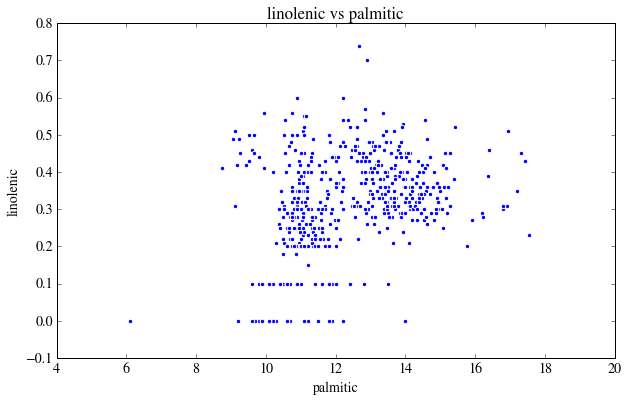

In [27]:
fig = plt.figure()
plt.scatter(df.palmitic,df.linolenic)
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
         14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

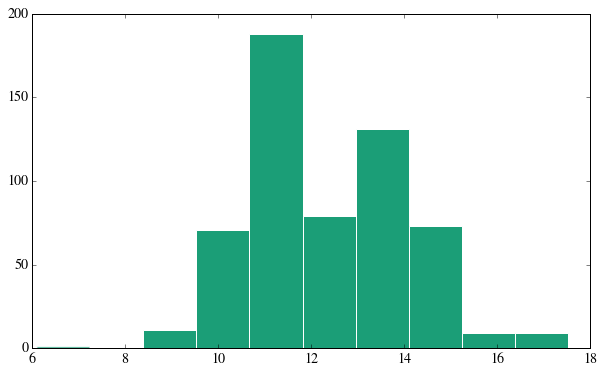

In [28]:
plt.hist(df.palmitic)

(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
         14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

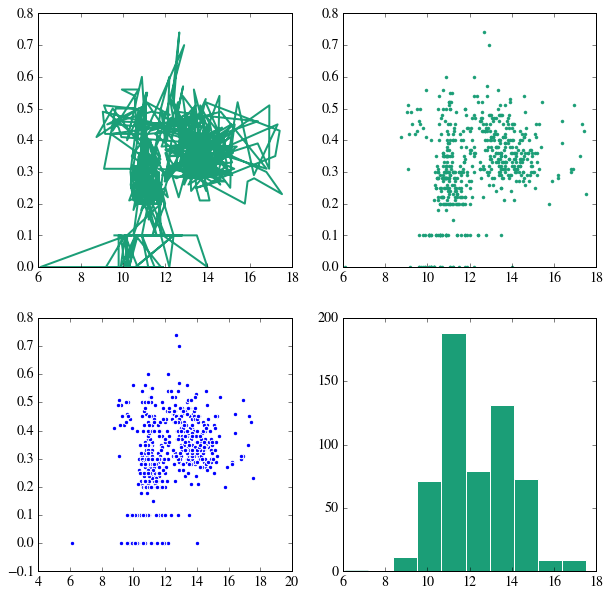

In [29]:
fig, axes = plt.subplots(figsize=(10,10),nrows =2, ncols = 2)
axes[0,0].plot(df.palmitic,df.linolenic)
axes[0,1].plot(df.palmitic,df.linolenic,'.')
axes[1,0].scatter(df.palmitic,df.linolenic)
axes[1,1].hist(df.palmitic)

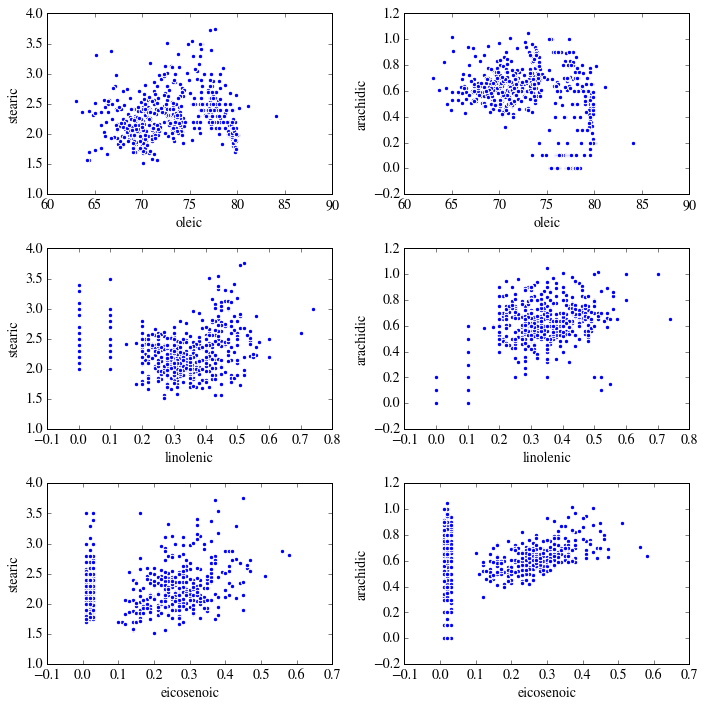

In [30]:
fig, axes = plt.subplots(figsize = (10,10),nrows = 3,ncols = 2)
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']

for i in range(3):
    for j in range(2):
#         print("i",i)
#         print("j",j)
        axes[i][j].scatter(df[xacids[i]],df[yacids[j]])
        axes[i][j].set_xlabel(xacids[i])
        axes[i][j].set_ylabel(yacids[j])

fig.tight_layout()
        


In [33]:
region_groupby = df.groupby('region')

In [34]:
region_groupby.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


In [37]:
for key, value in region_groupby:
    print "key: ", key 
    v = value
    print v.head()

key:  1
     areastring  region  area  palmitic  palmitoleic  stearic  oleic  linoleic  linolenic  arachidic  eicosenoic
0  North-Apulia       1     1     10.75         0.75     2.26  78.23      6.72       0.36       0.60        0.29
1  North-Apulia       1     1     10.88         0.73     2.24  77.09      7.81       0.31       0.61        0.29
2  North-Apulia       1     1      9.11         0.54     2.46  81.13      5.49       0.31       0.63        0.29
3  North-Apulia       1     1      9.66         0.57     2.40  79.52      6.19       0.50       0.78        0.35
4  North-Apulia       1     1     10.51         0.67     2.59  77.71      6.72       0.50       0.80        0.46
key:  2
          areastring  region  area  palmitic  palmitoleic  stearic  oleic  linoleic  linolenic  arachidic  eicosenoic
323  Inland-Sardinia       2     5     11.29         1.20     2.22  72.72     11.12       0.43       0.98        0.02
324  Inland-Sardinia       2     5     10.42         1.35     2.10  73

In [44]:
region_groupby.describe().head(10)

region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count   323.0  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean      1.0    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std       0.0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min       1.0    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%       1.0    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%       1.0    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%       1.0    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max       1.0    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count    98.0   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean      2.0    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388

In [45]:
region_groupby.describe()

region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count   323.0  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean      1.0    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std       0.0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min       1.0    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%       1.0    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%       1.0    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%       1.0    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max       1.0    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count    98.0   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean      2.0    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388
       std       0.0    0.475023    0.404111     0.138514    0.176363    1.418783    1.072336    0.053844    0.118826    0.007436
       min       2.0    5.000000   10.300000     0.350000    1.990000   68.820000   10.570000    0.150000    0.450000    0.010000
       25%       2.0    5.000000   10.852500     0.882500    2.120000   71.372500   11.122500    0.230000    0.660000    0.010000
       50%       2.0    5.000000   11.075000     0.960000    2.220000   73.255000   11.465000    0.270000    0.720000    0.020000
       75%       2.0    6.000000   11.372500     1.040000    2.395000   73.810000   13.065000    0.300000    0.810000    0.020000
       max       2.0    6.000000   12.130000     1.350000    2.720000   74.390000   14.700000    0.430000    1.050000    0.030000
3      count   151.0  151.000000  151.000000   151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
       mean      3.0    8.006623   10.948013     0.837351    2.308013   77.930530    7.270331    0.217881    0.375762    0.019735
       std       0.0    0.820542    0.825635     0.264388    0.389560    1.648155    1.431226    0.168865    0.293586    0.007298
       min       3.0    7.000000    6.100000     0.150000    1.700000   73.400000    5.100000    0.000000    0.000000    0.010000
       25%       3.0    7.000000   10.600000     0.690000    2.000000   76.800000    6.020000    0.100000    0.100000    0.010000
       50%       3.0    8.000000   10.900000     0.800000    2.300000   78.000000    6.800000    0.200000    0.380000    0.020000
       75%       3.0    9.000000   11.250000     1.000000    2.500000   79.500000    8.250000    0.350000    0.595000    0.025000
       max       3.0    9.000000   14.000000     1.800000    3.500000   84.100000   10.500000    0.700000    1.000000    0.030000

In [47]:
area_groupby = df.groupby('area')
area_groupby.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
25,Calabria,1,2,13.15,1.39,2.30,72.99,8.32,0.42,0.60,0.32
26,Calabria,1,2,13.21,1.36,2.17,71.74,9.50,0.43,0.63,0.30
27,Calabria,1,2,13.59,1.15,2.46,72.34,8.74,0.45,0.63,0.18
28,Calabria,1,2,13.78,1.11,2.72,71.27,9.40,0.46,0.64,0.23
29,Calabria,1,2,12.95,1.09,2.45,72.53,9.03,0.43,0.62,0.38


In [52]:
for key, value in region_groupby:
    print "key", key
    print "devations----"
    print value.std()

key 1
devations----
region         0.000000
area           0.741054
palmitic       1.529349
palmitoleic    0.507237
stearic        0.398709
oleic          3.451431
linoleic       2.106730
linolenic      0.079727
arachidic      0.111644
eicosenoic     0.083915
dtype: float64
key 2
devations----
region         0.000000
area           0.475023
palmitic       0.404111
palmitoleic    0.138514
stearic        0.176363
oleic          1.418783
linoleic       1.072336
linolenic      0.053844
arachidic      0.118826
eicosenoic     0.007436
dtype: float64
key 3
devations----
region         0.000000
area           0.820542
palmitic       0.825635
palmitoleic    0.264388
stearic        0.389560
oleic          1.648155
linoleic       1.431226
linolenic      0.168865
arachidic      0.293586
eicosenoic     0.007298
dtype: float64


In [53]:
df.groupby('region').std().head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [54]:
df.groupby('region').mean().head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [55]:
df.groupby('region').max().head()

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,South-Apulia,4,17.53,2.80,3.75,81.13,14.62,0.74,1.02,0.58
2,Inland-Sardinia,6,12.13,1.35,2.72,74.39,14.70,0.43,1.05,0.03
3,West-Liguria,9,14.00,1.80,3.50,84.10,10.50,0.70,1.00,0.03


In [56]:
dfbymean = df.groupby('region').mean()

In [57]:
dfbymean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [58]:
dfbystd = df.groupby('region').std()

In [59]:
dfbystd.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [60]:
df.head()


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [67]:
acidlist = df.columns.values[3:]

In [79]:
acidlist
dfbymean.head()

,area,palmitic_mean,palmitoleic_mean,stearic_mean,oleic_mean,linoleic_mean,linolenic_mean,arachidic_mean,eicosenoic_mean
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [84]:
dfbymeans_cols  = {k: k+'_mean' for k in acidlist}
dfbystd_cols = {k: k+'_std' for k in acidlist}
dfbymean.rename(columns=dfbymeans_cols,inplace=True)
dfbystd.rename(columns = dfbystd_cols,inplace=True)
dfbymean.columns.values
dfbystd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [87]:
dfpalmiticmean = dfbymean.iloc[:,[1]]
dfpalmiticstd = dfbystd.iloc[:,[1]]
newdfbyregion = dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

,palmitic_mean,palmitic_std
region,,
1,13.322879,1.529349
2,11.113469,0.404111
3,10.948013,0.825635


In [88]:
df.head()


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [111]:
# checking sum of oil contents
suma =0
for i in df.iloc[0,3:]:
    suma+=i
    print suma

10.75
11.5
13.76
91.99
98.71
99.07
99.67
99.96


In [113]:
df.shape

(572, 11)

In [114]:
weights  = np.random.uniform(size = df.shape[0])

In [117]:
weights.size

572

In [131]:
smallerdf = df[['palmitic']]
otherdf = df[['region']]
otherdf['weight'] = weights
otherdf.head()


/Users/anshu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,region,weight
0,1,0.596006
1,1,0.654768
2,1,0.286180
3,1,0.074490
4,1,0.868370


In [132]:
smallerdf = smallerdf.join(otherdf)

In [133]:
smallerdf.head()

,palmitic,region,weight
0,10.75,1,0.596006
1,10.88,1,0.654768
2,9.11,1,0.286180
3,9.66,1,0.074490
4,10.51,1,0.868370


In [134]:
def wfunc(f):
    return (f.palmitic*f.weight).sum()/f.weight.sum()

In [135]:
smallerdf.groupby('region').apply(wfunc)

region
1    13.367062
2    11.114789
3    10.933263
dtype: float64

In [136]:
def myfunc(columns):
    return np.sum(columns)

In [137]:
region_groupby.aggregate(myfunc)

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,North-ApuliaNorth-ApuliaNorth-ApuliaNorth-Apul...,899,4303.29,500.01,738.94,22933.03,3338.20,122.95,203.87,88.25
2,Inland-SardiniaInland-SardiniaInland-SardiniaI...,523,1089.12,94.81,221.66,7122.66,1172.60,26.55,71.71,1.90
3,UmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbr...,1209,1653.15,126.44,348.51,11767.51,1097.82,32.90,56.74,2.98


In [140]:
def myfunc2(f):
    return f.sum()

In [141]:
region_groupby.apply(myfunc2)

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,,
1,North-ApuliaNorth-ApuliaNorth-ApuliaNorth-Apul...,323,899,4303.29,500.01,738.94,22933.03,3338.20,122.95,203.87,88.25
2,Inland-SardiniaInland-SardiniaInland-SardiniaI...,196,523,1089.12,94.81,221.66,7122.66,1172.60,26.55,71.71,1.90
3,UmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbr...,453,1209,1653.15,126.44,348.51,11767.51,1097.82,32.90,56.74,2.98


In [142]:
region_groupby.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


In [143]:
area_groupby.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
25,Calabria,1,2,13.15,1.39,2.30,72.99,8.32,0.42,0.60,0.32
26,Calabria,1,2,13.21,1.36,2.17,71.74,9.50,0.43,0.63,0.30
27,Calabria,1,2,13.59,1.15,2.46,72.34,8.74,0.45,0.63,0.18
28,Calabria,1,2,13.78,1.11,2.72,71.27,9.40,0.46,0.64,0.23
29,Calabria,1,2,12.95,1.09,2.45,72.53,9.03,0.43,0.62,0.38


In [144]:
region_groupby.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


In [145]:
rkeys = [1,2,3]
rvals = ['South','Sardinia','North']
rmap = {rkeys[i]:rvals[i] for i in range(3)}
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

In [146]:
rmap = {a[0]:a[1] for a in zip(rkeys,rvals)}

In [147]:
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

In [171]:
mdf2 = df.groupby('region').apply(lambda x : x.mean())
mdf2 = mdf2.iloc[:,2:]

In [173]:
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


(0, 100)

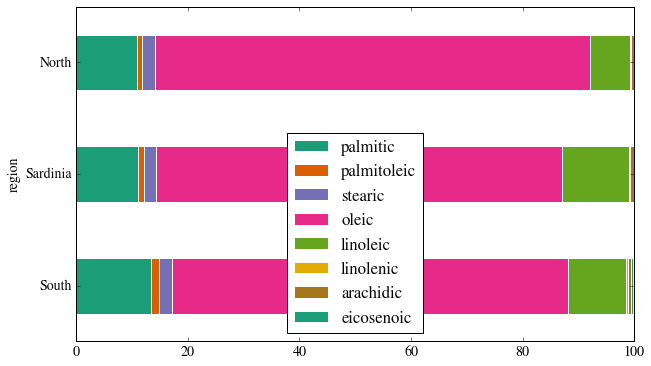

In [174]:
ax = mdf2.plot(kind='barh',stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])

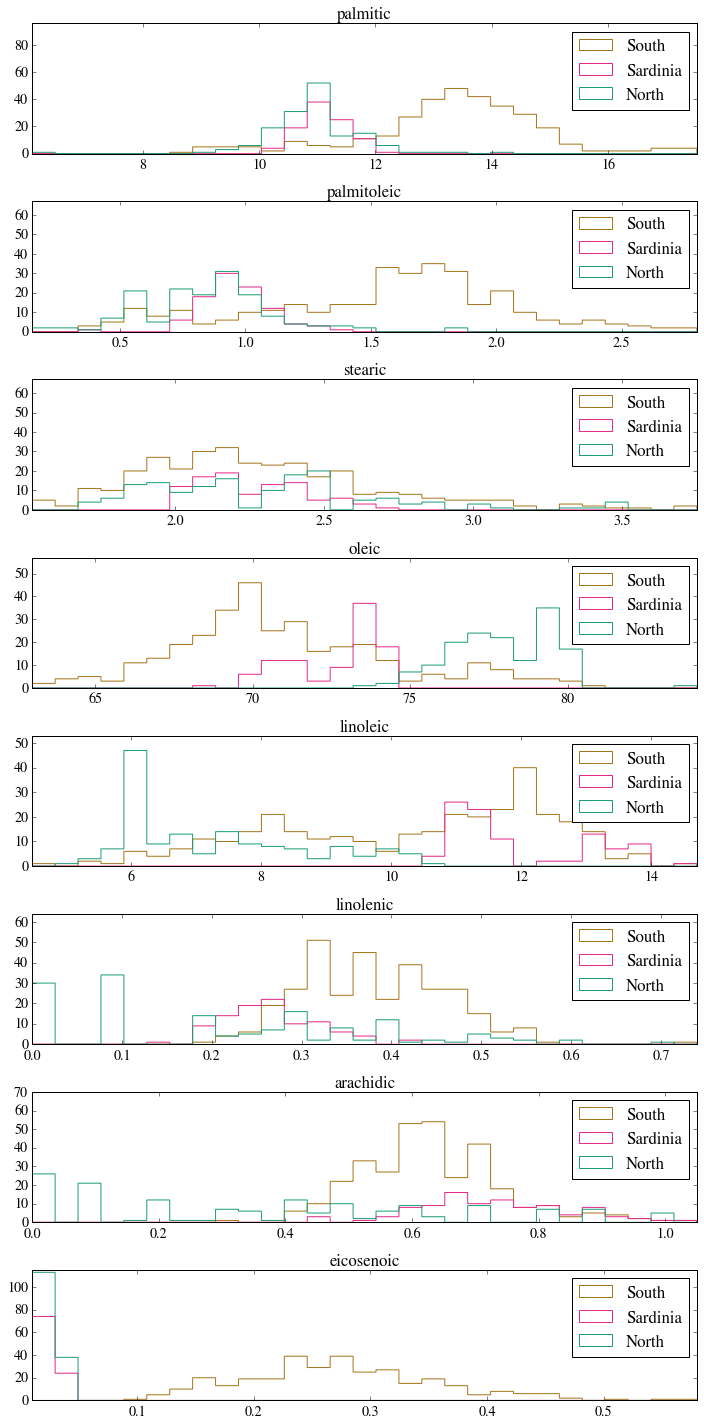

In [231]:
fig, axes = plt.subplots(figsize=(10,20),nrows = len(acidlist),ncols = 1)
colors=[dark2_cmap.mpl_colormap(col) for col in [1.0,0.5,0.0]]
i = 0
for ax in axes:
    acid = acidlist[i]
    seriesacid = df[acid]
#     if(i==0):
#         print seriesacid
    minmax = [seriesacid.min(),seriesacid.max()]
#     if(i==0):
#         print minmax
    counts = [];
    nbins = 30
    histbinlist = np.linspace(minmax[0],minmax[1],nbins)
#     if(i==0):
#         print histbinlist
    counts = -np.diff([seriesacid[seriesacid>x].count() for x in histbinlist]).min()
#     if(i==0):
#         print counts
    for k,v in df.groupby('region'):
        style = {'histtype':'step', 'color':colors[k-1], 'alpha':1.0,'label':rmap[k],'bins':histbinlist}
        ax.hist(v[acid],**style)
        ax.set_xlim(minmax)
        ax.set_title(acid)
        ax.legend()
        ax.set_ylim([0,counts])
    i=i+1
    
fig.tight_layout()

In [233]:
mask=(df['eicosenoic']<0.05)
mask

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
542     True
543     True
544     True
545     True
546     True
547     True
548     True
549     True
550     True
551     True
552     True
553     True
554     True
555     True
556     True
557     True
558     True
559     True
560     True
561     True
562     True
563     True
564     True
565     True
566     True
567     True
568     True
569     True
570     True
571     True
Name: eicosenoic, dtype: bool

In [236]:
print mask.sum() # number of true
print mask.mean() # probability 

249
0.435314685315


In [239]:
loweico = df[df.eicosenoic<0.02]
pd.crosstab(loweico.area,loweico.region)

region,2,3
area,,
5,19,0
6,11,0
7,0,17
8,0,11
9,0,14


In [240]:
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


(0, 100)

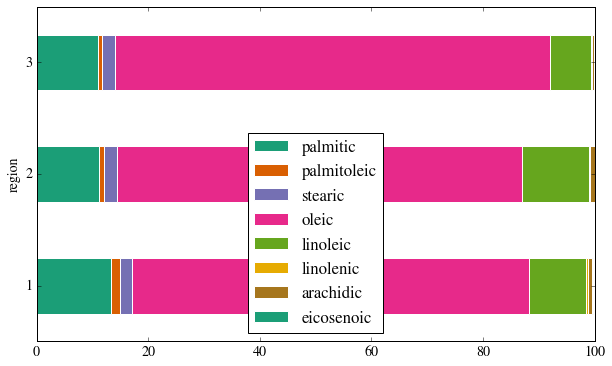

In [246]:
ax = mdf2.plot(kind='barh',stacked=True)
ax.set_xlim([0,100])

In [247]:
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [248]:
mdf2 = mdf2.drop(['oleic'],axis=1)

In [257]:
mdf2.head()

,palmitic,palmitoleic,stearic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,
1,13.322879,1.548019,2.287740,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,7.270331,0.217881,0.375762,0.019735


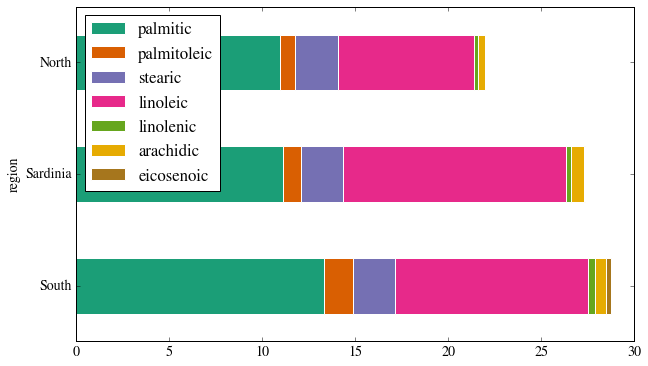

In [260]:
ax = mdf2.plot(kind='barh',stacked=True)
ax.set_yticklabels(rvals)

In [283]:
def make2d(df,scatterx, scattery, by='region', labeler={}):
    cs = list(np.linspace(0,1,len(df.groupby(by))))
    figure=plt.figure(figsize=(8,8))
    ax=plt.gca()
    for k,v in df.groupby(by):
#         print v.head()
#         print "scatterx", scatterx
        ax.scatter(v[scatterx],v[scattery],alpha=0.4,label=labeler.get(k,k),c = dark2_cmap.mpl_colormap(cs.pop()))
    ax.set_xlabel(scatterx)
    ax.set_ylabel(scattery)
    return ax
print rmap


{1: 'South', 2: 'Sardinia', 3: 'North'}


{1: 'South', 2: 'Sardinia', 3: 'North'}


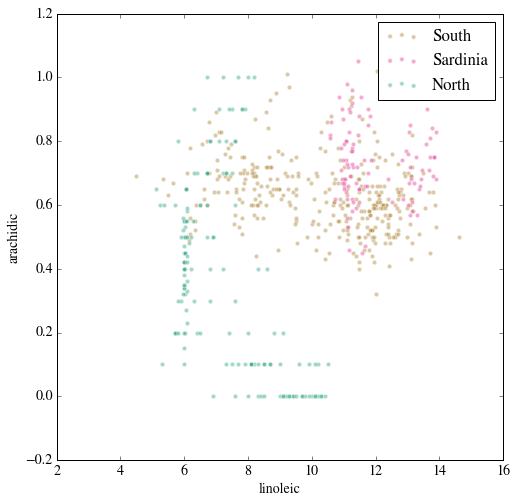

In [284]:
print rmap
a=make2d(df, "linoleic","arachidic", labeler=rmap)
a.legend(loc='upper right')

In [263]:
list(np.linspace(0,1,3))

[0.0, 0.5, 1.0]

In [338]:
df[(df.region==1 )&( df.area==1)][['area','region','palmitic']]
pd.crosstab(df.area,df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


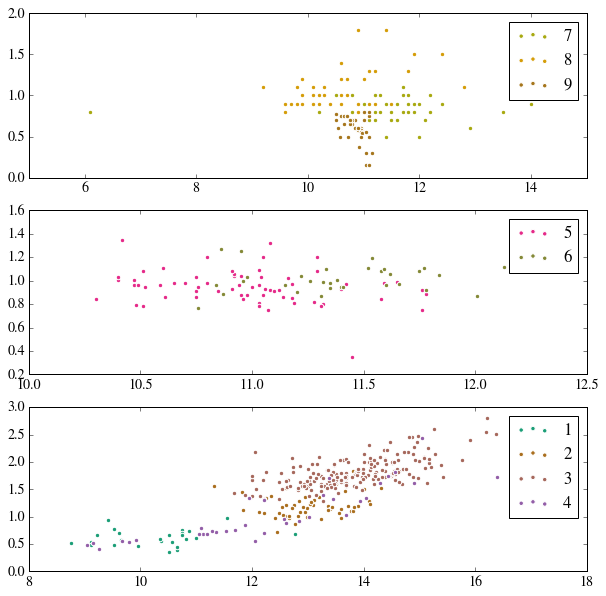

In [357]:
fig, axes = plt.subplots(figsize=(10,10),nrows =3, ncols = 1)
c = list(np.linspace(0,1,9))
cols = dark2_cmap.mpl_colormap(c)
# print cols
for i in range(1,10):
#     print i
    if(i<=4):
        axes[2].scatter(df[(df.region==1 )&( df.area==i)][['palmitic']],df[(df.region==1 )&( df.area==i)][['palmitoleic']],alpha=1,c=cols[i-1],label=i)
        axes[2].legend()
    elif(i<=6):
        axes[1].scatter(df[(df.region==2)&( df.area==i)][['palmitic']],df[(df.region==2 )&( df.area==i)][['palmitoleic']],alpha=1,c=cols[i-1],label=i)
        axes[1].legend()
    else:
        axes[0].scatter(df[(df.region==3 )&( df.area==i)][['palmitic']],df[(df.region==3 )&( df.area==i)][['palmitoleic']],alpha=1,c=cols[i-1],label=i)
        axes[0].legend()


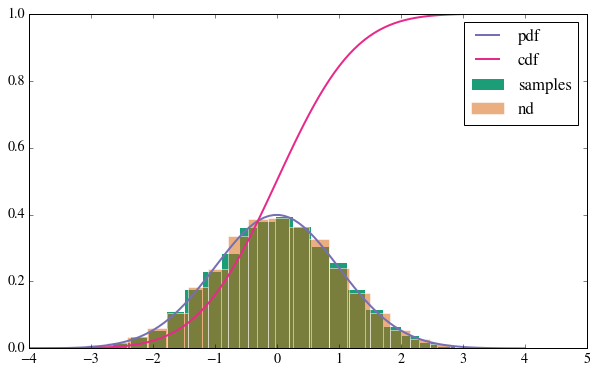

In [385]:
import scipy.stats as stats
mu=0
sigma =1
samples = np.random.normal(mu,sigma,10000)
plt.hist(samples,bins=25,normed=True,label='samples')
nd = stats.norm()
plt.hist(nd.rvs(size=10000), bins=25, alpha=0.5,normed=True,label='nd')
x = np.linspace(-4,4,100)
plt.plot(x,nd.pdf(x),label='pdf')
plt.plot(x,nd.cdf(x),label='cdf')
plt.legend()


In [360]:
help(np.random.normal)

Help on built-in function normal:

normal(...)
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float
        Mean ("centre") of the distribution.
    scale : float
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are